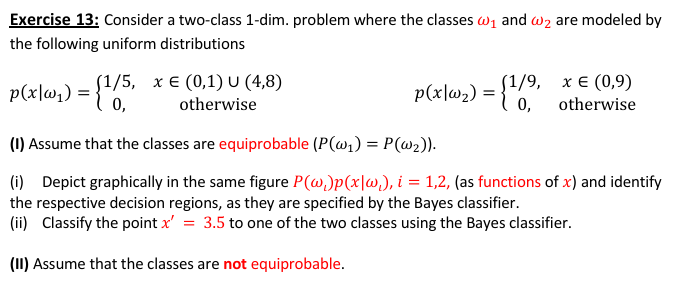
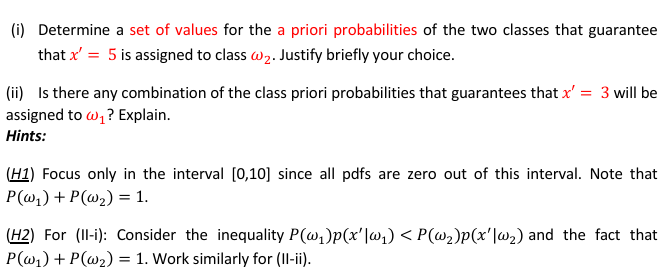

<>:23: SyntaxWarning: invalid escape sequence '\o'
<>:23: SyntaxWarning: invalid escape sequence '\o'
C:\Users\steli\AppData\Local\Temp\ipykernel_22304\883146398.py:23: SyntaxWarning: invalid escape sequence '\o'
  plt.title("Graphical Representation of $P(\omega_i)p(x|\omega_i)$ for i=1,2")


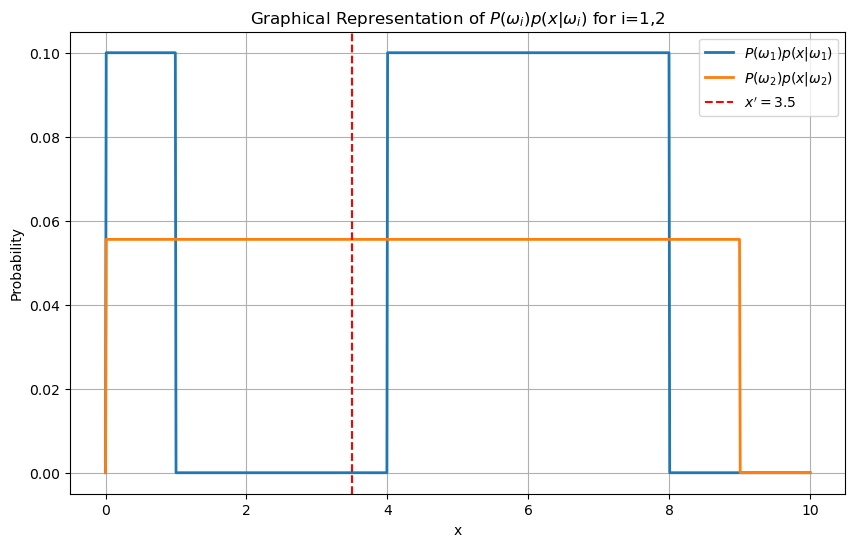

(I.ii) Point x' = 3.5 is classified as class ω2.
(II.i) For x' = 5 to favor ω2, P(ω1) must satisfy: (-oo < P_w1) & (P_w1 < 0.357142857142857)
(II.ii) For x' = 3 to favor ω1, P(ω1) must satisfy: (1.0 < P_w1) & (P_w1 < oo)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, Eq

# Define the probability density functions
def p_x_given_w1(x):
    return (1/5) * ((0 < x < 1) or (4 < x < 8))

def p_x_given_w2(x):
    return (1/9) * (0 < x < 9)

# (I.i) Plot scaled PDFs
P_w1 = 0.5
P_w2 = 0.5
x_values = np.linspace(0, 10, 1000)
P_w1_p_x_given_w1 = P_w1 * np.array([p_x_given_w1(x) for x in x_values])
P_w2_p_x_given_w2 = P_w2 * np.array([p_x_given_w2(x) for x in x_values])

plt.figure(figsize=(10, 6))
plt.plot(x_values, P_w1_p_x_given_w1, label=r"$P(\omega_1)p(x|\omega_1)$", linewidth=2)
plt.plot(x_values, P_w2_p_x_given_w2, label=r"$P(\omega_2)p(x|\omega_2)$", linewidth=2)
plt.axvline(x=3.5, color='red', linestyle='--', label=r"$x'=3.5$")
plt.title("Graphical Representation of $P(\omega_i)p(x|\omega_i)$ for i=1,2")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.savefig("decision_regions.png")
plt.show()

# (I.ii) Classify x' = 3.5
x_prime = 3.5
p_x_w1 = p_x_given_w1(x_prime)
p_x_w2 = p_x_given_w2(x_prime)
decision_class = "ω1" if P_w1 * p_x_w1 > P_w2 * p_x_w2 else "ω2"
print(f"(I.ii) Point x' = {x_prime} is classified as class {decision_class}.")

# (II.i) Determine range for x' = 5 favoring ω2
P_w1_sym, P_w2_sym = symbols('P_w1 P_w2')
P_w2_eq = Eq(P_w2_sym, 1 - P_w1_sym)
x_prime_5 = 5
p_x_5_w1 = p_x_given_w1(x_prime_5)
p_x_5_w2 = p_x_given_w2(x_prime_5)
inequality_5 = P_w1_sym * p_x_5_w1 < P_w2_sym * p_x_5_w2
inequality_5 = inequality_5.subs(P_w2_eq.lhs, P_w2_eq.rhs)
P_w1_range_5 = solve(inequality_5, P_w1_sym)
print(f"(II.i) For x' = 5 to favor ω2, P(ω1) must satisfy: {P_w1_range_5}")

# (II.ii) Determine range for x' = 3 favoring ω1
x_prime_3 = 3
p_x_3_w1 = p_x_given_w1(x_prime_3)
p_x_3_w2 = p_x_given_w2(x_prime_3)
inequality_3 = P_w1_sym * p_x_3_w1 > P_w2_sym * p_x_3_w2
inequality_3 = inequality_3.subs(P_w2_eq.lhs, P_w2_eq.rhs)
P_w1_range_3 = solve(inequality_3, P_w1_sym)
print(f"(II.ii) For x' = 3 to favor ω1, P(ω1) must satisfy: {P_w1_range_3}")
